# Warning
This notebook is under development- please use to evaluate entropy notebook and suggest desired changes only.

# Experiments on entropy

## Import libraries

In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Projects/tmsi-python-interface')
from TMSiSDK.file_readers import Poly5Reader
import collections
import math
sys.path.insert(0, '../resurfemg')
import helper_functions as hf

# Set a collection place for experiments

In [3]:
# do not rerun this cell
big_data_list= []

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [48]:
root_emg_directory = os.path.join('../not_pushed','topspin_data_anonymized')

In [49]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

Now you can pick a file from the list, which have been numbered.

In [50]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

# Caution! 
If you folder is set up in any way different then the picked file numbers will not neccesarily correspond to the same file. Always check the print out for the file you have chosen in the cell below

In [51]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen] 
print("The file you chose is:",file_chosen)

The file you chose is: ../not_pushed\topspin_data_anonymized\M001\001\EMG_recording.Poly5


In [52]:
data_emg = Poly5Reader(file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  ../not_pushed\topspin_data_anonymized\M001\001\EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


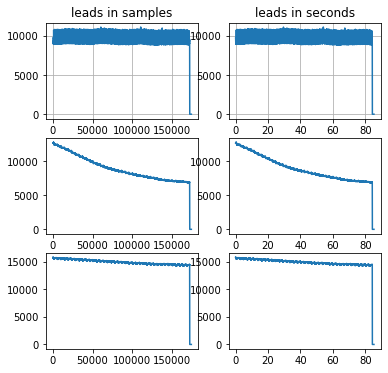

In [53]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
#ax.set_ylim([-4, 4])
axis[0,0].grid(True)
axis[0,0].plot(x[0])
axis[0,0].set(title='leads in samples')
axis[1,0].plot(x[1])
axis[2,0].plot(x[2])
axis[0,1].set(title='leads in seconds')
axis[0,1].grid(True)
axis[0,1].plot(converted_to_seconds,x[0])
axis[1,1].plot(converted_to_seconds,x[1])
axis[2,1].plot(converted_to_seconds,x[2])

That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. 

Do you want to cut and see the file in samples or seconds?

In [54]:
y_axis = widgets.Dropdown(
    options=["Samples","Seconds"],
    value='Samples',
    description="Select View Option",
    disabled=False,
)
display(y_axis)


Dropdown(description='Select View Option', options=('Samples', 'Seconds'), value='Samples')

In [55]:
time_view= y_axis.value
time_view

'Seconds'

Now you will pick the start and end of your sample. In the future we will have an updating graph here. 

In [56]:
# print(type(converted_to_seconds[-1]))

In [57]:
if time_view == 'Samples':
    int_slider1 = widgets.IntSlider(
        min=0, max=len(x[0]), step=1,
        description=' samples start'
    )
    int_slider2 = widgets.IntSlider(
        value=len(x[0]),
        min=0, max=len(x[0]), step=1,
        description='samples end cutoff'
    )
else:
    int_slider1 = widgets.IntSlider(
        #value=0.1,
        min=0, max= converted_to_seconds[-1], step=1,
        description='seconds start'
    )
    int_slider2 = widgets.IntSlider(
        #value=converted_to_seconds[-1],
        min=0, max=converted_to_seconds[-1], step= 1,
        description='seconds end cutoff'
    )
    
widgets.VBox(
    [

        int_slider1,
        int_slider2,

    ]
)



For now we will graph your choice in the next active cell

In [38]:
# start_s = float(start)* emg_sample_rate
# end_s = float(end)*emg_sample_rate

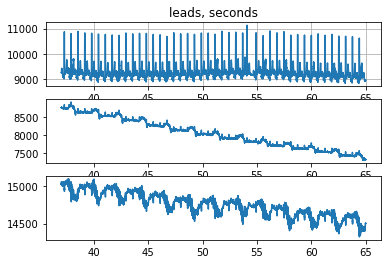

In [58]:
start = int_slider1.value
end= int_slider2.value
if time_view == 'Samples':
    # nox examine at a certain scale- from point a to b as samples
    x = data_samples
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(x[0][int(start):int(end)])
    ax_1.set(title='leads, samples')
    ax_2.plot(x[1][int(start):int(end)])
    ax_3.plot(x[2][int(start):int(end)])
    
if time_view == 'Seconds':
    # nox examine at a certain scale- from point a to b as samples
    x_for_secs = data_samples

    y = converted_to_seconds
    fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
    ax_1.grid(True)
    ax_1.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[0][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_1.set(title='leads, seconds')
    ax_2.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[1][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    ax_3.plot(y[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[2][int(start*emg_sample_rate):int(end*emg_sample_rate)])
    

Happy with your selection? If not redo the widgeted cell, then we can see how the filter the selection in a basic pipleline before extracint entropy.

In [59]:
# dropdown to pick ICA possibilities. CUrrently only one -\o/-
ICA_choice = widgets.Dropdown(
    options=["classic","no_ica_lead3"],
    value='classic',
    description="Select View Option",
    disabled=False,
)
display(ICA_choice)

Dropdown(description='Select View Option', options=('classic', 'no_ica_lead3'), value='classic')

Here we will have to rewrite to accomodate different ICAs, but this is in the future. After we iron out the alternative ICAs. Below we put our EMG data through the pipeline we have now, and we must do picking from an ICA by more peaks (this will also change.)

In [60]:
ICA_picker_choice = widgets.Dropdown(
    options=["more_peaks","similar_to_ECG"],
    value='more_peaks',
    description="Select View Option",
    disabled=False,
)
display(ICA_picker_choice)

Dropdown(description='Select View Option', options=('more_peaks', 'similar_to_ECG'), value='more_peaks')

In [61]:
def working_pipeline_pre_entropy(our_chosen_samples): 
    cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(cut_file_data, 5, 450, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the picking step!
    emg= hf.pick_more_peaks_array(components)
    # now process it in final steps
    abs_values = abs(emg)
    final_envelope_d = hf.emg_highpass_butter(abs_values, 150, 2048)
    
        
    return final_envelope_d

In [62]:
# processed_data_emg = working_pipeline_pre_entropy(data_samples)
# plt.plot(processed_data_emg)

# Let's examine out processed EMG

C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


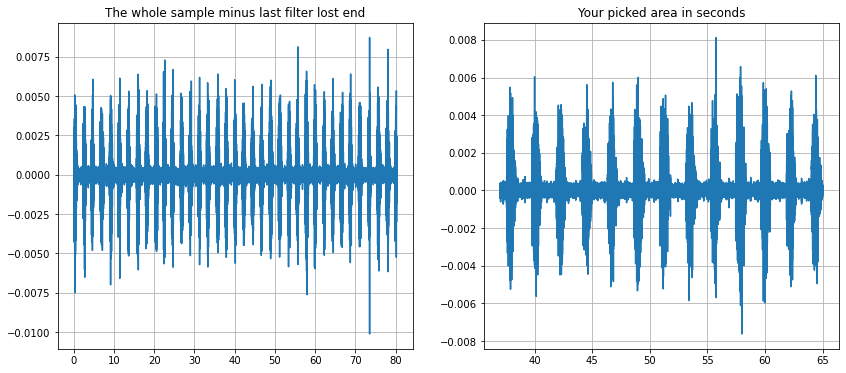

In [63]:
processed_data_emg = working_pipeline_pre_entropy(data_samples)
if time_view == 'Seconds':
    %matplotlib inline
    # set up plotn
    x = processed_data_emg
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
    axis[0].grid(True)
    axis[0].plot(converted_to_seconds[:len(x)], x)
    axis[0].set(title='The whole sample minus last filter lost end')
    axis[1].set(title='Your picked area in seconds')
    axis[1].grid(True)
    axis[1].plot(converted_to_seconds[int(start*emg_sample_rate):int(end*emg_sample_rate)],x[int(start*emg_sample_rate):int(end*emg_sample_rate)])
else:
    %matplotlib inline
    x = processed_data_emg
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 6))
    axis[0].grid(True)
    axis[0].plot(x)
    axis[0].set(title='The whole sample minus last filter lost end')
    axis[1].set(title='Your picked area in samples')
    axis[1].grid(True)
    axis[1].plot(converted_to_samples[int(start):int(end)],x[int(start):int(end)])
    

Now we created some basic processed EMG. We will graph it based on te sample selected and the cutoff on entropy.


In [64]:
# Now we want to select where the cut_off is

entropy_cutoff = widgets.Dropdown(
    options=["Mean","Half_range"],
    value='Mean',
    description="Select Entropy Cut off",
    disabled=False,
)
display(entropy_cutoff)


Dropdown(description='Select Entropy Cut off', options=('Mean', 'Half_range'), value='Mean')

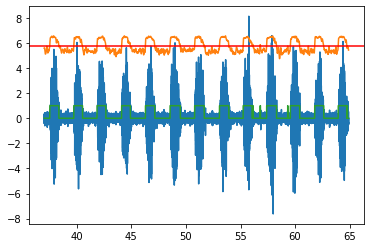

In [66]:
def rounded_for_ent(stralist):
    rounded= np.round_(stralist, decimals = 5)
    return rounded
start_s= start * emg_sample_rate
end_s = end * emg_sample_rate
if time_view == 'Samples':
    big_list = rounded_for_ent(processed_data_emg[int(start):int(end)])# replace with whole array of time series!
else:
   
    big_list = rounded_for_ent(processed_data_emg[int(start_s):int(end_s)])
slice_length = 100
def sliceIterator(lst, sliceLen):
    for i in range(len(lst) - sliceLen + 1):
        yield lst[i:i + sliceLen]
index_hold = []
for slice in sliceIterator(big_list, slice_length):
    entropy_index = hf.entropical(slice)
    index_hold.append(entropy_index)

if entropy_cutoff.value == 'Half_range':
    decision_cutoff = (np.max(index_hold) + np.min(index_hold))/2
else:# entropy_cutoff.value == 'Mean':
    decision_cutoff = np.mean(index_hold)


rms_rolled = hf.vect_naive_rolling_rms(index_hold,100) # so rms is rms entropy
if time_view == 'Samples':
    #y= converted_to_samples
    plt.plot(converted_to_samples[int(start):(int(start) + len(rms_rolled))],processed_data_emg[int(start):(int(start) + len(rms_rolled))]*1000)
    plt.plot(converted_to_samples[int(start):(int(start) + len(rms_rolled))],rms_rolled)
    plt.plot(converted_to_samples[int(start):(int(start) + len(rms_rolled))],hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff))
    plt.axhline(y = decision_cutoff, color = 'r', linestyle = '-')
    
else:
    y = converted_to_seconds
    plt.plot(converted_to_seconds[int(start_s):(int(start_s)+int(len(rms_rolled)))], processed_data_emg[int(start_s):(int(start_s)+len(rms_rolled))]*1000)
    plt.plot(converted_to_seconds[int(start_s):(int(start_s)+int(len(rms_rolled)))],rms_rolled)
    plt.plot(converted_to_seconds[int(start_s):(int(start_s)+int(len(rms_rolled)))],hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff))
    plt.axhline(y = decision_cutoff, color = 'r', linestyle = '-')
    

# Changes here!
instead of above code we will do
pick breath based on 90% entropy
then 50%- this will give start of breath
define peak value within 90%
moving forward to right 70%-> with smoothing away if there is too short a pause

Now we need to do this adaptively over the whole signal. But how often should we cut to get the mean or half value?

First we can compare counted 'breaths' to algorithm breaths, then we can compare a sequence of peaks.

In [ ]:
my_count = input()

In [ ]:
if time_view == 'Seconds':    
     decision_line = hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff)
else:
    decision_line = hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff)
    
max_per_peak_count = hf.count_decision_array(decision_line)
max_per_peak_count

Now let's compare our peak value sequence



Also we are looking at distance from zero to positive maxima, but the amplitude would be from adjancent low value...
We can look at an absolute value array?

In [ ]:
def find_maxima_in_high_entropy_area(our_array,start=0, end=10000, decision_cutoff='mean'):
    """
    Finds maxima in high entropy areas. You need to have made an rms rolled variable.
    The function is not yet optimized, but works. 
    """
    # big_list = np.round(our_array[start:end], 5)
    # np.round_(stralist, decimals = 5)
    decision_array = hf.zero_one_for_jumps_base(rms_rolled,decision_cutoff)
    if decision_array[0] == 1:
        ups_and_downs = np.logical_xor(decision_array[1:], decision_array[:-1])
        indeces_of_boundaries = np.where(ups_and_downs)[0]
        maxima = []
        boundaries = np.append(
            np.append(np.zeros(1), indeces_of_boundaries),
            np.zeros(1) + len(our_array),
        )
        # print(boundaries)
        boundaries = boundaries.astype(np.int32)
        for slice_start, slice_end in zip(boundaries[::2], boundaries[1::2]):
            #print(slice_start, slice_end)
            beat = our_array[slice_start:slice_end]
            maxima.append(slice_start + np.where(beat == beat.max())[0][0])
        maxima_values = our_array[maxima]
        # print(maxima_values)
        rep_array = np.zeros(len(our_array))
        rep_array[maxima] = np.mean(maxima_values)
        plt.plot(our_array, alpha = 0.7)
        plt.plot(rep_array, alpha = 0.4)
    else: 
        ups_and_downs = np.logical_xor(decision_array[1:], decision_array[:-1])
        indeces_of_boundaries = np.where(ups_and_downs)[0]
        maxima = []
        boundaries = np.append(
            indeces_of_boundaries,
            np.zeros(1) + len(our_array),
        )
        boundaries = boundaries.astype(np.int32)
        for slice_start, slice_end in zip(boundaries[::2], boundaries[1::2]):
            #print(slice_start, slice_end)
            beat = our_array[slice_start:slice_end]
            maxima.append(slice_start + np.where(beat == beat.max())[0][0])
        maxima_values = our_array[maxima]
        #print(maxima_values)
        rep_array = np.zeros(len(our_array))
        rep_array[maxima] = np.mean(maxima_values)
        plt.plot(our_array, alpha = 0.7)
        plt.plot(rep_array, alpha = 0.4)
    return maxima, maxima_values
        

In [ ]:
if time_view == 'Samples':
    our_array = processed_data_emg[int(start):int(end)]
    starter=int(start)
    ender= int(end)
else: 
    our_array = processed_data_emg[int(start_s):int(end_s)]
    starter=int(start_s)
    ender= int(end_s)

find_maxima_in_high_entropy_area(our_array,start=starter, end=ender, decision_cutoff=decision_cutoff)
# note the x axis will be from zero counting up but represent the difference

There are several decisions that need to be made here. Note the following:
    
    We are looking at maxima on the positive. Maybe we should be looking on both sides of zero? Maybe we should be lokking at an absolute value, and then find the maxima? Also note our cut-off on entropy was a bit arbitraty, and gave us an extra breath. These are decisions for the scientific side of a team that need to happen before this interface can go furhter.  

Then we have to decide if we do area under curve for the absolute value, or what?

Also, is mean or half entropy sufficient? I don't think so, for some files it works but look at example file 12 from the start to 10,000. ENtropy of 3/4 max might have been better?

In [ ]:
Now I can save off the info on this run:

In [ ]:
data_now = [file_chosen, number_chosen, time_view, start, end, my_count, max_per_peak_count, maxima, maxima_values]

In [ ]:
data_now

In [ ]:
big_data_list.append(data_now)
big_data_list

In [ ]:
columns_now = ['file_chosen',
               'number_file',
               'units',
               'start_cut',
               'end_cut',
               'my_hand_count',
               'automated_breath_count',
               'maxima',
               'maxima_values',
               ]

df = pd.DataFrame(big_data_list, columns=columns_now)

In [ ]:
df

In [ ]:
#You probably want to change the name to a timestamp, and save every hour, at least. 
df.to_csv('my_saved_entropy_experiments.csv')